In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import holidays


In [2]:
df_energy = pd.read_csv('/content/0x36b85cbdf1364c49a7154ac42ecc64de.csv', sep=';')
df_energy['fldTime'] = pd.to_datetime(df_energy['fldTime'], format='%d.%m.%Y %H:%M')

In [3]:
weather_df = pd.read_csv('/content/weather_data_full.csv')
weather_df['fldTime'] = pd.to_datetime(weather_df['fldTime'], format='%Y-%m-%d %H:%M:%S')

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20784 entries, 0 to 20783
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fldTime               20784 non-null  datetime64[ns]
 1   temperature           20784 non-null  float64       
 2   humidity              20784 non-null  int64         
 3   apparent_temperature  20784 non-null  float64       
 4   precipitation         20784 non-null  float64       
 5   rain                  20784 non-null  float64       
 6   snowfall              20784 non-null  float64       
 7   weather_code          20784 non-null  int64         
 8   pressure_msl          20784 non-null  float64       
 9   surface_pressure      20784 non-null  float64       
 10  cloud_cover           20784 non-null  int64         
 11  wind_speed            20784 non-null  float64       
 12  wind_direction        20784 non-null  int64         
 13  wind_gusts      

In [5]:
data = pd.merge(df_energy, weather_df, on='fldTime', how='left')

In [6]:
data

,fldTime,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,wind_speed,wind_direction,wind_gusts
0,2022-10-14 10:00:00,0.4588,7.7,64.0,2.7,0.0,0.0,0.00,1.0,1018.4,996.4,34.0,20.9,311.0,40.3
1,2022-10-14 10:30:00,0.4924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-14 11:00:00,0.5728,7.7,60.0,2.6,0.0,0.0,0.00,3.0,1018.6,996.6,85.0,20.9,318.0,39.2
3,2022-10-14 11:30:00,0.5772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-14 12:00:00,0.5532,7.2,63.0,2.1,0.0,0.0,0.00,3.0,1018.9,996.8,100.0,20.8,332.0,39.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44934,2025-02-25 05:00:00,58.6880,-10.4,88.0,-14.9,0.0,0.0,0.00,3.0,1022.8,999.2,100.0,8.1,329.0,20.2
44935,2025-02-25 05:30:00,56.1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44936,2025-02-25 06:00:00,54.5920,-10.1,85.0,-14.6,0.2,0.0,0.14,71.0,1022.8,999.2,100.0,7.3,340.0,17.6
44937,2025-02-25 06:30:00,55.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
weather_columns = list(weather_df.columns)
weather_columns.remove('fldTime')

In [8]:
data.set_index('fldTime', inplace=True)

In [9]:
data[weather_columns] = data[weather_columns].interpolate(method='time')

In [10]:
data[weather_columns] = data[weather_columns].fillna(method='ffill')
data[weather_columns] = data[weather_columns].fillna(method='bfill')


/tmp/ipython-input-2120254325.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[weather_columns] = data[weather_columns].fillna(method='ffill')
/tmp/ipython-input-2120254325.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[weather_columns] = data[weather_columns].fillna(method='bfill')


In [11]:
data.head()

,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,wind_speed,wind_direction,wind_gusts
fldTime,,,,,,,,,,,,,,
2022-10-14 10:00:00,0.4588,7.70,64.0,2.70,0.0,0.0,0.0,1.0,1018.40,996.4,34.0,20.90,311.0,40.30
2022-10-14 10:30:00,0.4924,7.70,62.0,2.65,0.0,0.0,0.0,2.0,1018.50,996.5,59.5,20.90,314.5,39.75
2022-10-14 11:00:00,0.5728,7.70,60.0,2.60,0.0,0.0,0.0,3.0,1018.60,996.6,85.0,20.90,318.0,39.20
2022-10-14 11:30:00,0.5772,7.45,61.5,2.35,0.0,0.0,0.0,3.0,1018.75,996.7,92.5,20.85,325.0,39.20
2022-10-14 12:00:00,0.5532,7.20,63.0,2.10,0.0,0.0,0.0,3.0,1018.90,996.8,100.0,20.80,332.0,39.20


In [12]:
data['fldValue'] = pd.to_numeric(data['fldValue'])

In [13]:
ru_holiday = holidays.Russia()
data['Holiday'] = data.index.to_series().apply(lambda x: x in ru_holiday).astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44939 entries, 2022-10-14 10:00:00 to 2025-02-25 07:00:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fldValue              44939 non-null  float64
 1   temperature           44939 non-null  float64
 2   humidity              44939 non-null  float64
 3   apparent_temperature  44939 non-null  float64
 4   precipitation         44939 non-null  float64
 5   rain                  44939 non-null  float64
 6   snowfall              44939 non-null  float64
 7   weather_code          44939 non-null  float64
 8   pressure_msl          44939 non-null  float64
 9   surface_pressure      44939 non-null  float64
 10  cloud_cover           44939 non-null  float64
 11  wind_speed            44939 non-null  float64
 12  wind_direction        44939 non-null  float64
 13  wind_gusts            44939 non-null  float64
 14  Holiday               44939 non-nul

In [15]:
train = data[(data.index.year < 2024) |
             ((data.index.year == 2025) & (data.index.month < 2))]

test = data[(data.index.year == 2025) & (data.index.month == 2)]

In [16]:
X_train = train.drop(columns=['fldValue'], axis=1)
y_train = train['fldValue']
X_test = test.drop(columns=['fldValue'], axis=1)
y_test = test['fldValue']

In [17]:
start = data.index.min().strftime('%Y-%m-%d')
end = data.index.max().strftime('%Y-%m-%d')
print(start)
print(end)

2022-10-14
2025-02-25


<Axes: >

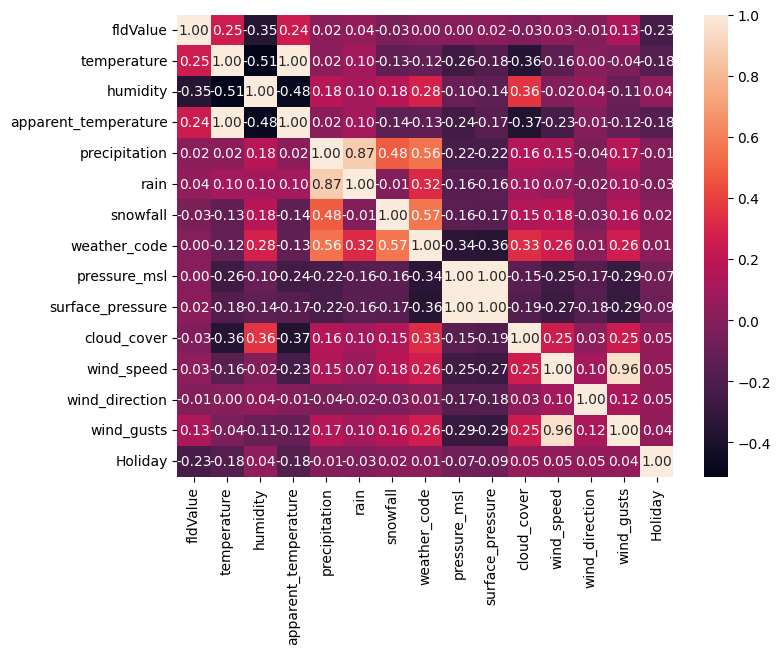

In [18]:
plt.figure(figsize=(8, 6))
cl=data.select_dtypes(include=['int', 'float']).columns
sns.heatmap(data[cl].corr(), annot=True, fmt='.2f')

<Axes: xlabel='fldValue', ylabel='Count'>

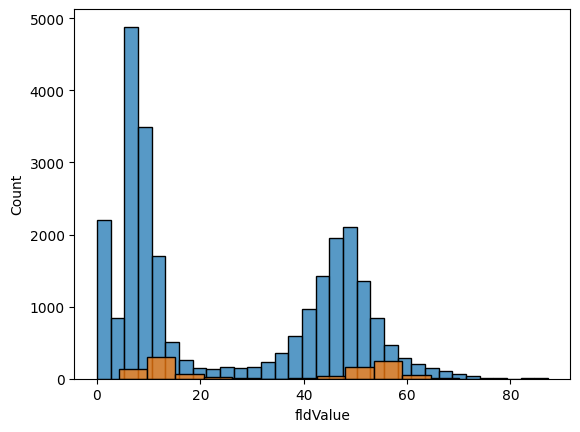

In [19]:
sns.histplot(train['fldValue'])
sns.histplot(test['fldValue'])

In [20]:
data['Month'] = data.index.month
data['Day'] = data.index.dayofweek
data['Hour'] = data.index.hour
data['Years'] = data.index.year

In [21]:
train_month = data[(data['Month'] == 11) & (data['Years'] == 2024)]
test_week = data[(data['Month'] == 12) & (data.index.day <= 7) & (data['Years'] == 2024)]

In [22]:
data.loc['2023-05-09']['fldValue'].head()

,fldValue
fldTime,
2023-05-09 00:00:00,3.328
2023-05-09 00:30:00,3.488
2023-05-09 01:00:00,3.552
2023-05-09 01:30:00,3.520
2023-05-09 02:00:00,3.488


<Axes: xlabel='fldTime'>

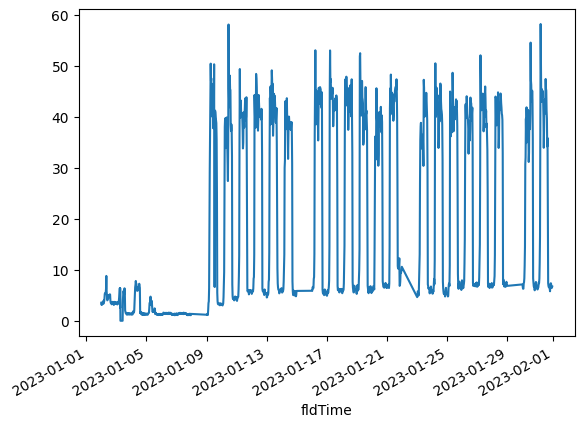

In [23]:
data[(data['Month'] == 1) & (data['Years'] == 2023) & (data['Day'] <= 5)]['fldValue'].plot()

<Axes: xlabel='fldTime'>

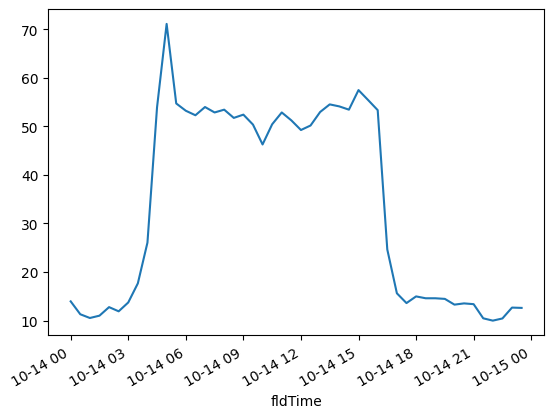

In [24]:
data.loc['2024-10-14']['fldValue'].plot()

Text(0, 0.5, 'Мощность')

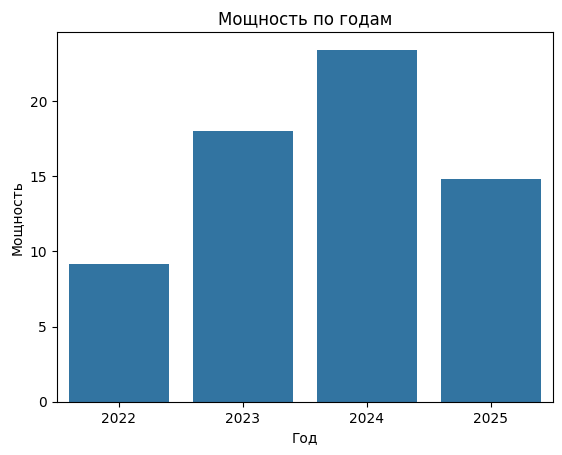

In [25]:
median_power = data.groupby('Years')['fldValue'].median().reset_index()
plt.title('Мощность по годам')
sns.barplot(data=median_power, x='Years', y='fldValue')
plt.xlabel('Год')
plt.ylabel('Мощность')

In [26]:
data.describe()

,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,wind_speed,wind_direction,wind_gusts,Holiday,Month,Day,Hour,Years
count,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000,44939.000000
mean,28.573210,3.778727,76.922452,0.077272,0.061378,0.035877,0.017925,12.391770,1016.935464,994.605207,72.264736,14.178418,208.293647,26.123915,0.052627,6.780636,2.976234,11.460980,2023.377089
std,22.431631,12.072104,15.962364,13.912842,0.240049,0.210336,0.082924,22.468013,12.051901,11.558611,38.863419,6.562087,92.527974,11.344966,0.223290,3.767668,2.007034,6.904617,0.787320
min,0.000000,-33.700000,19.000000,-39.300000,0.000000,0.000000,0.000000,0.000000,972.600000,951.300000,0.000000,0.000000,1.000000,1.100000,0.000000,1.000000,0.000000,0.000000,2022.000000
25%,8.224000,-5.200000,68.000000,-10.400000,0.000000,0.000000,0.000000,1.000000,1008.700000,986.800000,38.000000,9.000000,152.000000,17.300000,0.000000,3.000000,1.000000,6.000000,2023.000000
50%,15.552000,2.200000,81.500000,-2.350000,0.000000,0.000000,0.000000,3.000000,1016.800000,994.700000,100.000000,13.450000,216.000000,25.200000,0.000000,7.000000,3.000000,11.000000,2023.000000
75%,49.248000,14.300000,89.500000,12.050000,0.000000,0.000000,0.000000,3.000000,1024.400000,1001.850000,100.000000,18.400000,284.000000,33.650000,0.000000,10.000000,5.000000,17.000000,2024.000000
max,105.472000,33.200000,100.000000,35.500000,8.200000,8.200000,2.030000,75.000000,1055.600000,1030.100000,100.000000,47.300000,360.000000,99.700000,1.000000,12.000000,6.000000,23.000000,2025.000000


In [27]:
data[data['fldValue']==0]

,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,wind_speed,wind_direction,wind_gusts,Holiday,Month,Day,Hour,Years
fldTime,,,,,,,,,,,,,,,,,,,
2023-01-03 06:30:00,0.0,-3.65,88.50,-9.600,0.0,0.0,0.0,3.0,1011.250,988.500,100.00,21.60,282.00,38.150,1,1,1,6,2023
2023-01-03 07:00:00,0.0,-3.80,89.00,-9.600,0.0,0.0,0.0,3.0,1011.300,988.500,100.00,20.10,280.00,37.100,1,1,1,7,2023
2023-01-03 07:30:00,0.0,-3.65,88.00,-9.500,0.0,0.0,0.0,3.0,1011.350,988.550,100.00,20.75,283.50,36.350,1,1,1,7,2023
2023-01-03 08:00:00,0.0,-3.50,87.00,-9.400,0.0,0.0,0.0,3.0,1011.400,988.600,100.00,21.40,287.00,35.600,1,1,1,8,2023
2023-01-03 08:30:00,0.0,-3.50,87.50,-9.250,0.0,0.0,0.0,3.0,1011.250,988.450,100.00,20.15,285.50,35.250,1,1,1,8,2023
2023-01-03 09:00:00,0.0,-3.50,88.00,-9.100,0.0,0.0,0.0,3.0,1011.100,988.300,100.00,18.90,284.00,34.900,1,1,1,9,2023
2023-01-03 09:30:00,0.0,-3.60,88.00,-9.000,0.0,0.0,0.0,3.0,1010.850,988.050,100.00,17.60,281.00,32.950,1,1,1,9,2023
2023-01-03 10:00:00,0.0,-3.70,88.00,-8.900,0.0,0.0,0.0,3.0,1010.600,987.800,100.00,16.30,278.00,31.000,1,1,1,10,2023
2023-06-12 11:00:00,0.0,18.40,30.00,15.000,0.0,0.0,0.0,2.0,1025.700,1004.300,72.00,17.40,38.00,37.400,1,6,0,11,2023


In [28]:
data['fldValue'] = data['fldValue'].replace(0, pd.NA)
data['fldValue'] = pd.to_numeric(data['fldValue'], errors='coerce')


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44939 entries, 2022-10-14 10:00:00 to 2025-02-25 07:00:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fldValue              44929 non-null  float64
 1   temperature           44939 non-null  float64
 2   humidity              44939 non-null  float64
 3   apparent_temperature  44939 non-null  float64
 4   precipitation         44939 non-null  float64
 5   rain                  44939 non-null  float64
 6   snowfall              44939 non-null  float64
 7   weather_code          44939 non-null  float64
 8   pressure_msl          44939 non-null  float64
 9   surface_pressure      44939 non-null  float64
 10  cloud_cover           44939 non-null  float64
 11  wind_speed            44939 non-null  float64
 12  wind_direction        44939 non-null  float64
 13  wind_gusts            44939 non-null  float64
 14  Holiday               44939 non-nul

In [30]:
data['fldValue']  = data['fldValue'].interpolate(method='time')

In [31]:
is_value_hours = data[data['fldValue'] >
                      data['fldValue'].quantile(0.95)]['Hour'].value_counts().reset_index()
is_value_hours.sort_values(by='Hour')

,Hour,count
11,4,122
0,5,290
6,6,177
3,7,207
5,8,188
8,9,169
9,10,127
1,11,229
4,12,205
2,13,211


In [32]:
data['sliding_median'] = data['fldValue'].rolling(window='6h', min_periods=1).median()
data

,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,wind_speed,wind_direction,wind_gusts,Holiday,Month,Day,Hour,Years,sliding_median
fldTime,,,,,,,,,,,,,,,,,,,,
2022-10-14 10:00:00,0.4588,7.70,64.0,2.70,0.00,0.0,0.000,1.0,1018.40,996.4,34.0,20.90,311.0,40.30,0,10,4,10,2022,0.4588
2022-10-14 10:30:00,0.4924,7.70,62.0,2.65,0.00,0.0,0.000,2.0,1018.50,996.5,59.5,20.90,314.5,39.75,0,10,4,10,2022,0.4756
2022-10-14 11:00:00,0.5728,7.70,60.0,2.60,0.00,0.0,0.000,3.0,1018.60,996.6,85.0,20.90,318.0,39.20,0,10,4,11,2022,0.4924
2022-10-14 11:30:00,0.5772,7.45,61.5,2.35,0.00,0.0,0.000,3.0,1018.75,996.7,92.5,20.85,325.0,39.20,0,10,4,11,2022,0.5326
2022-10-14 12:00:00,0.5532,7.20,63.0,2.10,0.00,0.0,0.000,3.0,1018.90,996.8,100.0,20.80,332.0,39.20,0,10,4,12,2022,0.5532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25 05:00:00,58.6880,-10.40,88.0,-14.90,0.00,0.0,0.000,3.0,1022.80,999.2,100.0,8.10,329.0,20.20,0,2,1,5,2025,6.8160
2025-02-25 05:30:00,56.1280,-10.25,86.5,-14.75,0.10,0.0,0.070,37.0,1022.80,999.2,100.0,7.70,334.5,18.90,0,2,1,5,2025,9.5680
2025-02-25 06:00:00,54.5920,-10.10,85.0,-14.60,0.20,0.0,0.140,71.0,1022.80,999.2,100.0,7.30,340.0,17.60,0,2,1,6,2025,10.2400


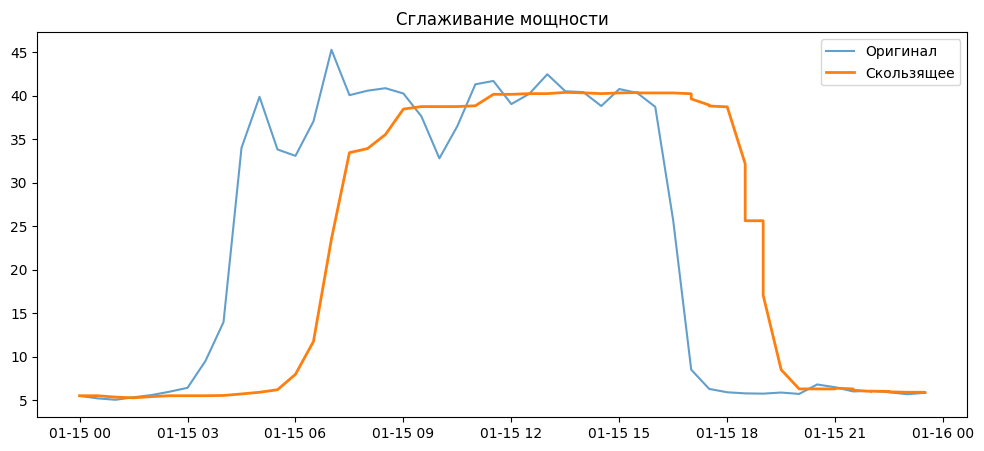

In [33]:
sample = data.loc['2023-01-15']

plt.figure(figsize=(12, 5))
plt.plot(sample.index, sample['fldValue'], label='Оригинал', alpha=0.7)
plt.plot(sample.index, sample['sliding_median'], label='Скользящее', linewidth=2)
plt.legend()
plt.title('Сглаживание мощности')
plt.show()

In [34]:
data['fldValue_lag1'] = data['fldValue'].shift(1)
data['fldValue_lag2'] = data['fldValue'].shift(2)


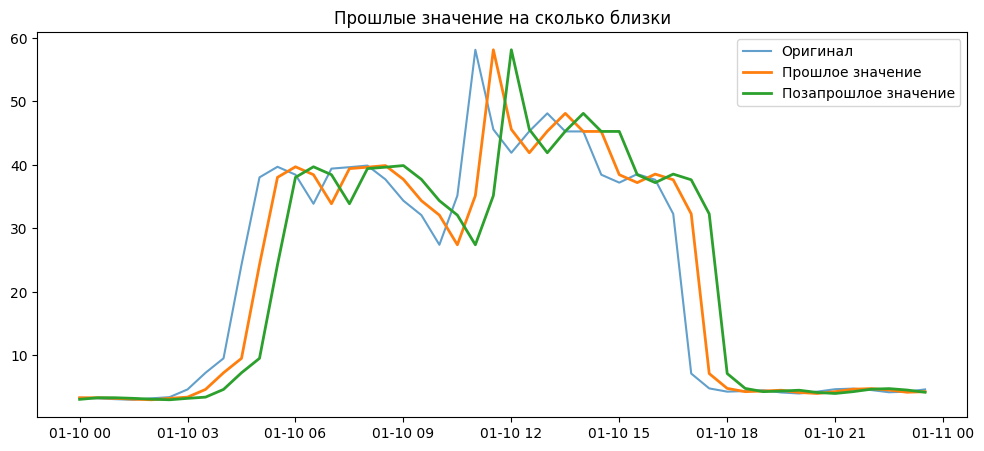

In [35]:
sample = data.loc['2023-01-10']

plt.figure(figsize=(12, 5))
plt.plot(sample.index, sample['fldValue'], label='Оригинал', alpha=0.7)
plt.plot(sample.index, sample['fldValue_lag1'], label='Прошлое значение', linewidth=2)
plt.plot(sample.index, sample['fldValue_lag2'], label='Позапрошлое значение', linewidth=2)

plt.legend()
plt.title('Прошлые значение на сколько близки')
plt.show()

In [36]:
data['pick_summer'] = ((data['Month'] >= 6) & (data['Month'] <= 8)).astype(int)

In [37]:
!pip install holidays

In [38]:
import holidays

data = data.reset_index()
ru_holiday = holidays.Russia()
data['Holiday'] = data['fldTime'].apply(lambda x: x in ru_holiday).astype(int)
data.set_index('fldTime', drop=True, inplace=True)

In [39]:
data['work_day'] = ((data['Day'] <= 5) & (data['Hour'] >= 9) & (data['Hour'] <= 18)).astype(int)

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['fldValue'], model='additive', period=48)
data['season'] = result.seasonal

In [41]:
data

,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,...,Month,Day,Hour,Years,sliding_median,fldValue_lag1,fldValue_lag2,pick_summer,work_day,season
fldTime,,,,,,,,,,,,,,,,,,,,,
2022-10-14 10:00:00,0.4588,7.70,64.0,2.70,0.00,0.0,0.000,1.0,1018.40,996.4,...,10,4,10,2022,0.4588,NaN,NaN,0,1,-1.251037
2022-10-14 10:30:00,0.4924,7.70,62.0,2.65,0.00,0.0,0.000,2.0,1018.50,996.5,...,10,4,10,2022,0.4756,0.4588,NaN,0,1,0.184265
2022-10-14 11:00:00,0.5728,7.70,60.0,2.60,0.00,0.0,0.000,3.0,1018.60,996.6,...,10,4,11,2022,0.4924,0.4924,0.4588,0,1,1.200800
2022-10-14 11:30:00,0.5772,7.45,61.5,2.35,0.00,0.0,0.000,3.0,1018.75,996.7,...,10,4,11,2022,0.5326,0.5728,0.4924,0,1,1.856512
2022-10-14 12:00:00,0.5532,7.20,63.0,2.10,0.00,0.0,0.000,3.0,1018.90,996.8,...,10,4,12,2022,0.5532,0.5772,0.5728,0,1,1.496167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25 05:00:00,58.6880,-10.40,88.0,-14.90,0.00,0.0,0.000,3.0,1022.80,999.2,...,2,1,5,2025,6.8160,63.4560,25.1520,0,0,3.282630
2025-02-25 05:30:00,56.1280,-10.25,86.5,-14.75,0.10,0.0,0.070,37.0,1022.80,999.2,...,2,1,5,2025,9.5680,58.6880,63.4560,0,0,4.165964
2025-02-25 06:00:00,54.5920,-10.10,85.0,-14.60,0.20,0.0,0.140,71.0,1022.80,999.2,...,2,1,6,2025,10.2400,56.1280,58.6880,0,0,3.167263


In [42]:
mean = data['fldValue'].mean()
std = data['fldValue'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

data[(data['fldValue'] < lower_bound) | (data['fldValue'] > upper_bound)]

,fldValue,temperature,humidity,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,...,Month,Day,Hour,Years,sliding_median,fldValue_lag1,fldValue_lag2,pick_summer,work_day,season
fldTime,,,,,,,,,,,,,,,,,,,,,
2024-07-03 11:30:00,95.968,30.95,42.5,31.50,0.0,0.0,0.0,3.0,1007.95,987.85,...,7,2,11,2024,88.464,94.176,94.720,1,1,-1.616715
2024-07-04 06:30:00,95.872,30.65,51.0,34.05,0.0,0.0,0.0,0.0,1012.10,991.85,...,7,3,6,2024,14.368,92.160,90.944,1,0,3.714977
2024-07-04 07:00:00,98.304,31.20,48.0,34.80,0.0,0.0,0.0,0.0,1012.20,992.00,...,7,3,7,2024,27.344,95.872,92.160,1,0,4.049425
2024-07-04 07:30:00,97.664,31.60,46.0,35.15,0.0,0.0,0.0,0.5,1012.20,992.00,...,7,3,7,2024,64.864,98.304,95.872,1,0,2.943019
2024-07-04 08:00:00,100.928,32.00,44.0,35.50,0.0,0.0,0.0,1.0,1012.20,992.00,...,7,3,8,2024,92.160,97.664,98.304,1,0,2.651254
2024-07-04 08:30:00,100.064,31.95,45.0,35.25,0.0,0.0,0.0,1.0,1012.20,992.00,...,7,3,8,2024,93.952,100.928,97.664,1,0,0.522475
2024-07-04 09:00:00,97.920,31.90,46.0,35.00,0.0,0.0,0.0,1.0,1012.20,992.00,...,7,3,9,2024,95.120,100.064,100.928,1,1,0.124083
2024-07-04 11:00:00,98.080,29.10,60.0,32.20,0.5,0.5,0.0,53.0,1013.50,993.10,...,7,3,11,2024,96.768,87.584,83.552,1,1,-1.314521
2024-07-04 11:30:00,96.704,26.40,71.0,29.80,2.1,2.1,0.0,58.0,1014.05,993.45,...,7,3,11,2024,97.184,98.080,87.584,1,1,-2.670834


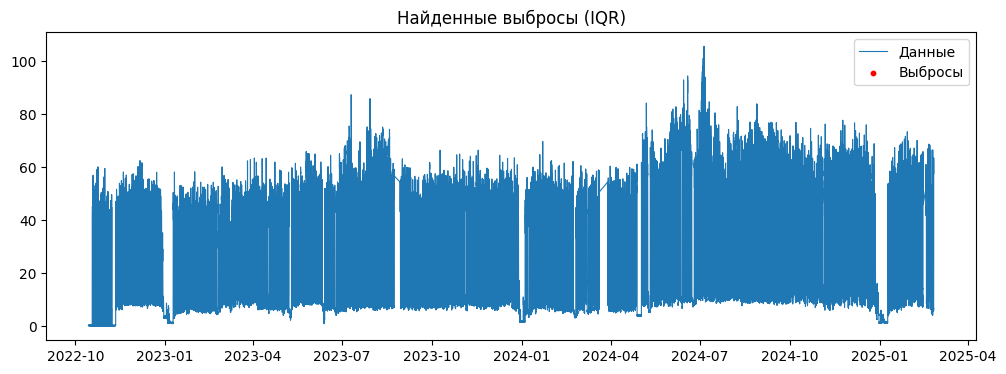

In [43]:
Q1 = data['fldValue'].quantile(0.25)
Q3 = data['fldValue'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = data[data['fldValue'] > upper_bound]

plt.figure(figsize=(12, 4))
plt.plot(data.index, data['fldValue'], label='Данные', linewidth=0.8)
plt.scatter(outliers.index, outliers['fldValue'], color='red', s=10, label='Выбросы')
plt.legend()
plt.title('Найденные выбросы (IQR)')
plt.show()

<Axes: xlabel='fldValue', ylabel='Count'>

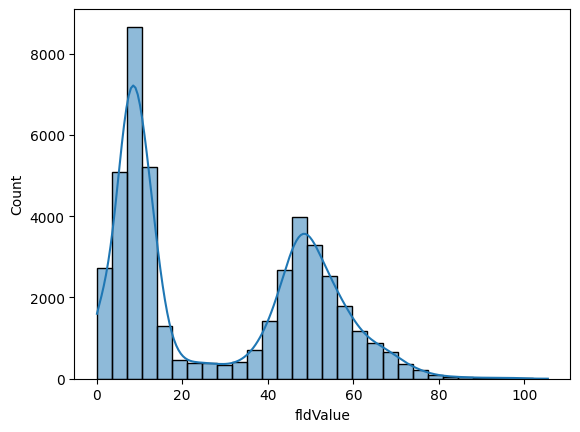

In [44]:
sns.histplot(data=data['fldValue'], bins=30, kde=True)

In [45]:
data.groupby(['Years', 'Month'])['fldValue'].median()

Years  Month
2022   10        0.5702
       11        9.0240
       12       14.1920
2023   1         7.0720
       2        13.8560
       3        16.8640
       4        18.5920
       5        13.6960
       6        12.8960
       7        21.0720
       8        25.9520
       9        21.5040
       10       36.0320
       11       36.9920
       12       26.9120
2024   1        18.6240
       2        16.3040
       3        14.9440
       4        12.7360
       5        15.4240
       6        14.7840
       7        46.9440
       8        30.4960
       9        52.4480
       10       45.3440
       11       27.9040
       12       16.7040
2025   1        12.3680
       2        28.3520
Name: fldValue, dtype: float64

In [46]:
data['lag_168'] = data['fldValue'].shift(24*7)

In [47]:
data['rolling_median_168h'] = data['fldValue'].rolling(window=168).median()

In [48]:
from scipy.stats import linregress

def rolling_trend(x):
    if len(x) < 12: return np.nan
    slope, _, _, _, _ = linregress(range(len(x)), x)
    return slope

data['load_trend_24h'] = data['fldValue'].rolling(24).apply(rolling_trend, raw=True)

In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
window = 24 * 2

data['rolling_mean'] = data['fldValue'].rolling(window=window, center=True, min_periods=1).mean()
data['rolling_std'] = data['fldValue'].rolling(window=window, center=True, min_periods=1).std()

data['z_score'] = np.abs(data['fldValue'] - data['rolling_mean']) / (data['rolling_std'] + 0.0001)

data['is_outlier'] = (data['z_score'] > 3).astype(int)

print(f"Найдено локальных выбросов: {data['is_outlier'].sum()}")

Найдено локальных выбросов: 6


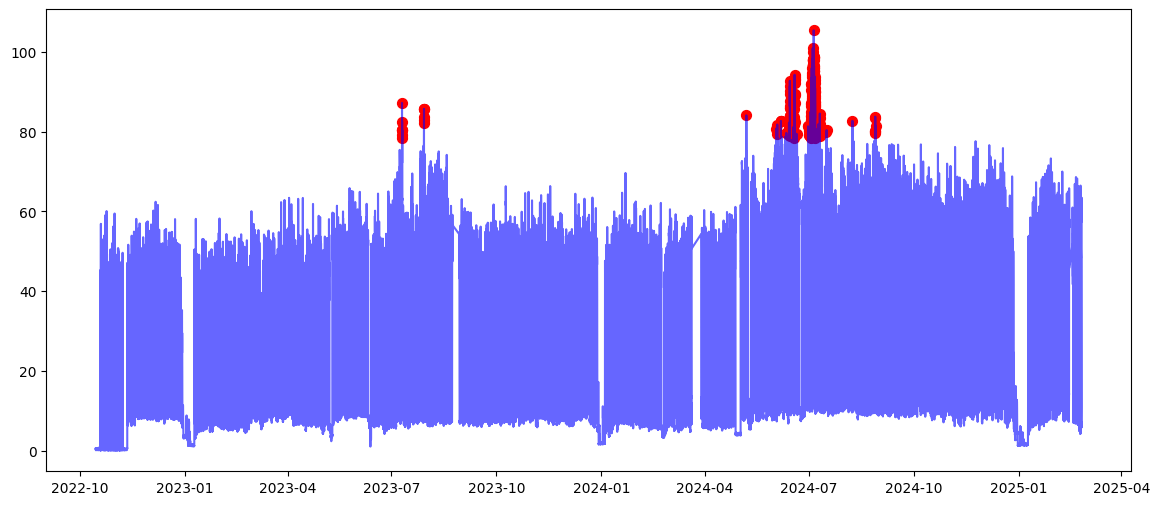

In [51]:
iso_forest = IsolationForest(contamination=0.005, random_state=42)
data['anomaly_iso'] = iso_forest.fit_predict(data[['fldValue']])
data['anomaly_iso'] = data['anomaly_iso'].apply(lambda x: True if x == -1 else False)
anomalies = data[data['anomaly_iso'] == True]

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['fldValue'], label='Выработка', color='blue', alpha=0.6)
plt.scatter(anomalies.index, anomalies['fldValue'], color='red', label='Аномалии (Isolation Forest)', s=50)


In [52]:
data['rolling_q05'] = data['fldValue'].rolling(window=window, center=True).quantile(0.05)
threshold = data['rolling_q05'] - 5
data['is_pit'] = data['fldValue'] < threshold


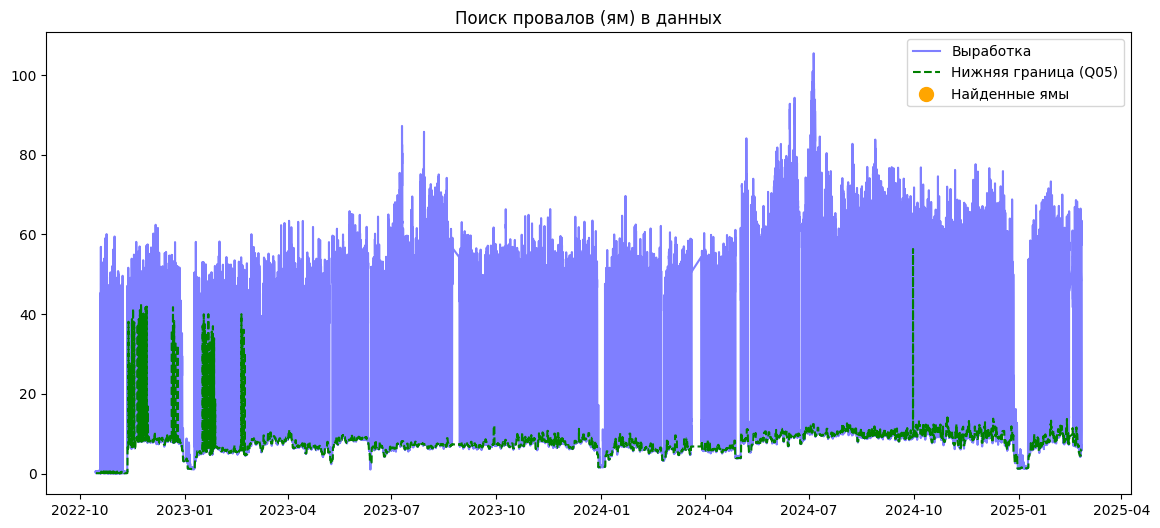

Найденные провалы:
Empty DataFrame
Columns: [fldValue]
Index: []


In [53]:
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['fldValue'], label='Выработка', color='blue', alpha=0.5)

plt.plot(data.index, data['rolling_q05'], label='Нижняя граница (Q05)', color='green', linestyle='--')

pits = data[data['is_pit']]
plt.scatter(pits.index, pits['fldValue'], color='orange', label='Найденные ямы', s=100, zorder=5)

plt.title('Поиск провалов (ям) в данных')
plt.legend()
plt.show()

print("Найденные провалы:")
print(pits[['fldValue']].head())

<Axes: xlabel='fldTime'>

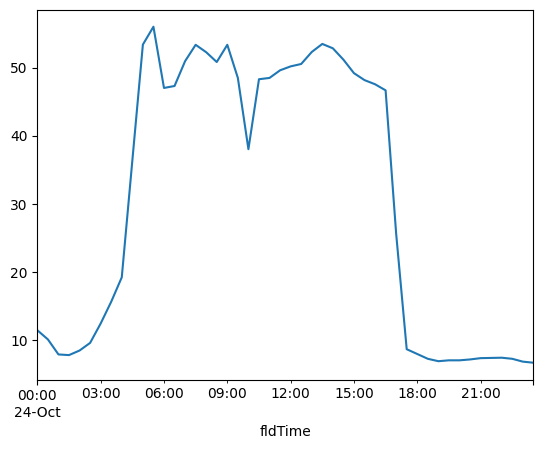

In [54]:
data.loc['2023-10-24']['fldValue'].plot()

In [55]:
data['trend_1h'] = data['fldValue'].diff(1)
data['acceleration'] = data['trend_1h'].diff(1)

In [56]:
data['ewm_24h'] = data['fldValue'].ewm(span=24, adjust=False).mean()

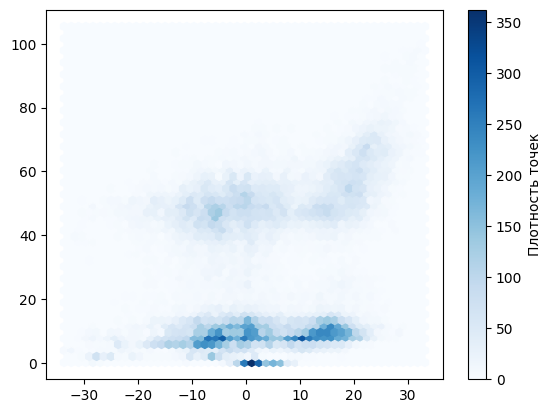

In [57]:
plt.hexbin(data['temperature'], data['fldValue'], gridsize=50, cmap='Blues')
plt.colorbar(label='Плотность точек')

In [58]:
data['high_heating_risk'] = ((data['temperature'] < 8) | (data['temperature'] >= 30)).astype(int)

<Axes: xlabel='fldTime'>

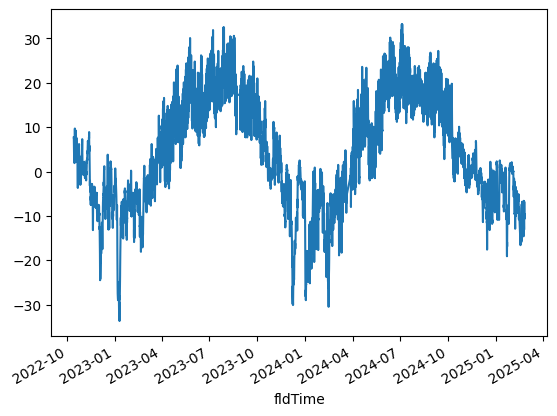

In [59]:
data['temperature'].plot()

In [60]:
data['temp_24h_avg'] = data['temperature'].rolling(window=24, min_periods=1).mean()
data['is_heating_24h_avg'] = (data['temp_24h_avg'] < 8).astype(int)

In [61]:
wind_speed_safe = data['wind_speed'] + 1e-6
data['wind_chill_effect'] = (10 - data['temperature']) * np.log1p(wind_speed_safe) * (data['temperature'] < 10).astype(int)

In [62]:
data['heat_index_effect'] = (data['temperature'] - 20) * (data['humidity'] / 100) * (data['temperature'] > 20).astype(int)


In [63]:
wind_dir_rad = data['wind_direction'] * (np.pi / 180)

data['wind_dir_sin'] = np.sin(wind_dir_rad)
data['wind_dir_cos'] = np.cos(wind_dir_rad)

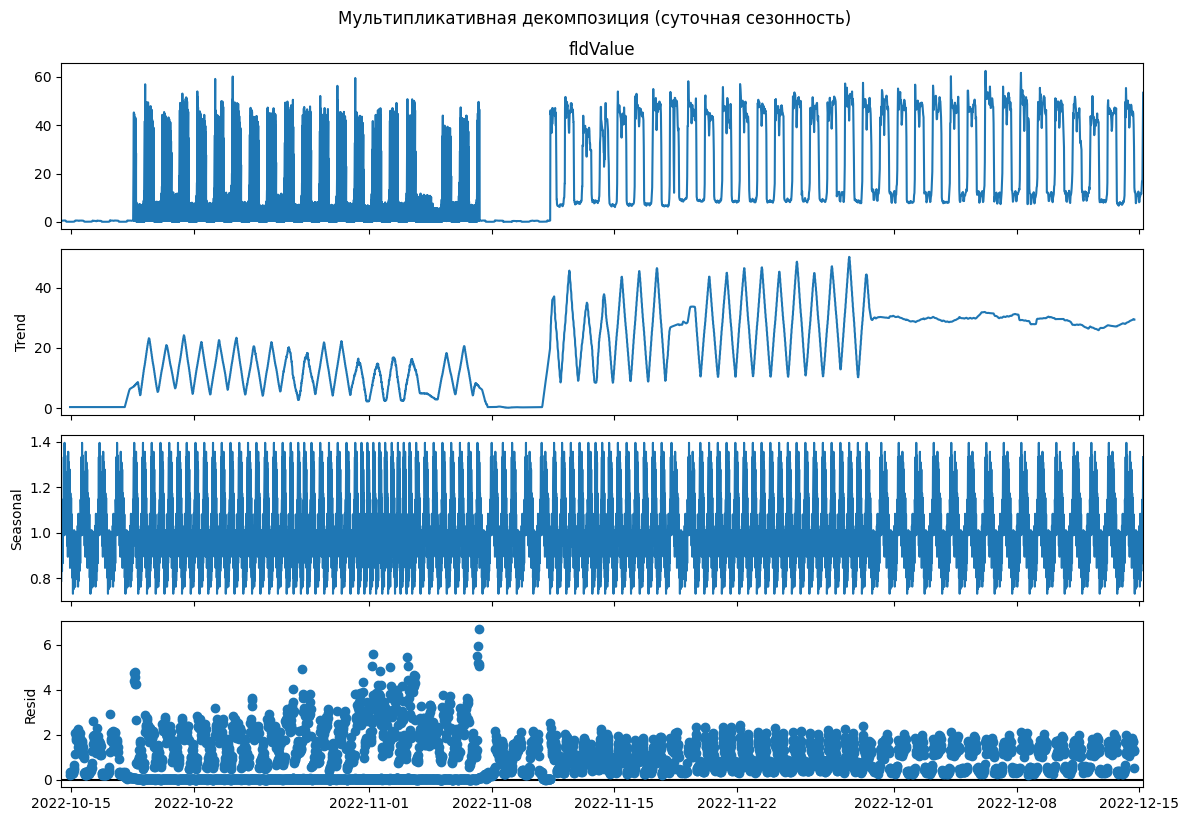

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

time_series = data['fldValue'][:5_000]
daily_period = 48

result = seasonal_decompose(time_series.dropna(), model='multiplicative', period=daily_period)
plt.rcParams.update({'figure.figsize': (12, 8)})
fig = result.plot()
fig.suptitle('Мультипликативная декомпозиция (суточная сезонность)', y=1.02)
plt.show()


<Axes: >

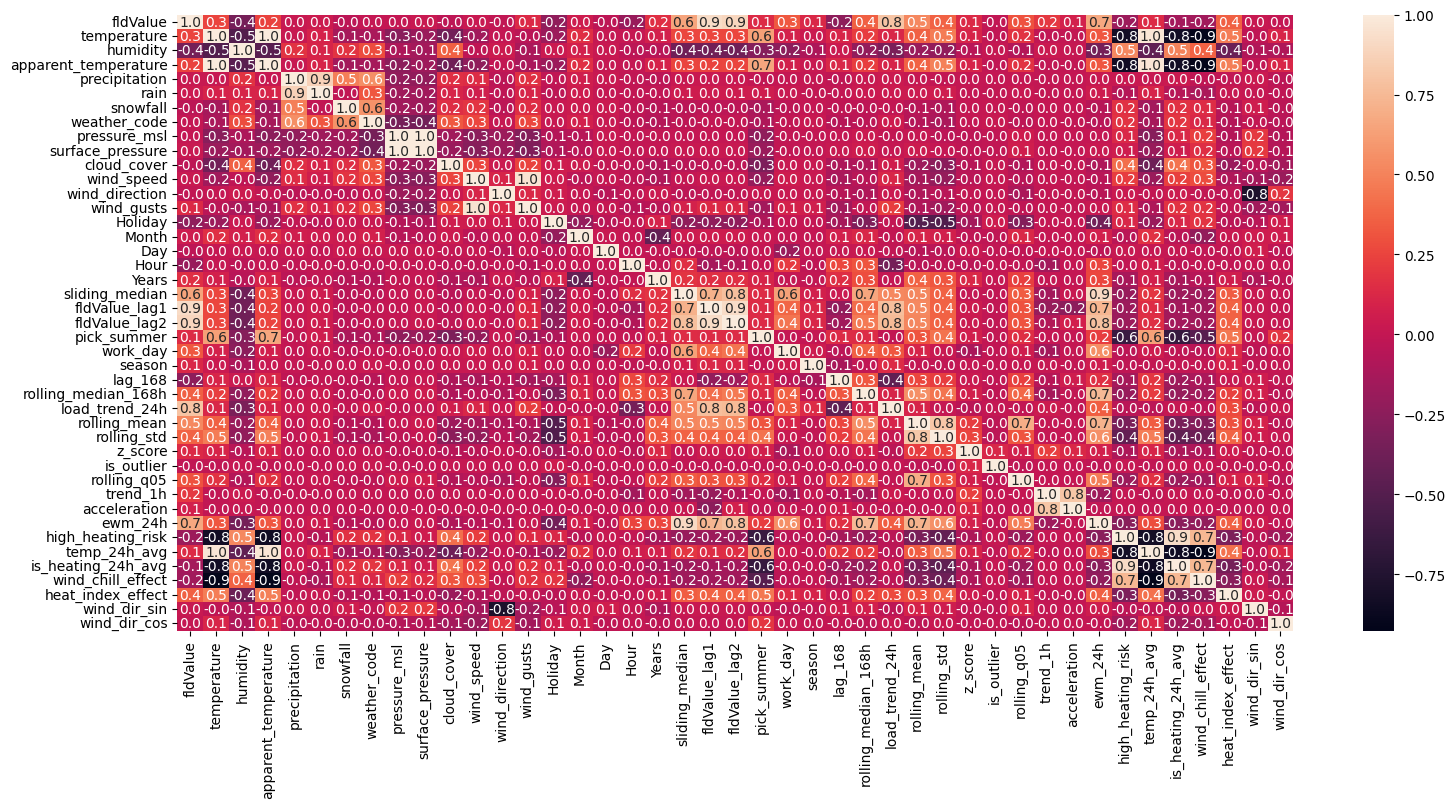

In [65]:
plt.figure(figsize=(18, 8))
cl = data.select_dtypes(include=['int', 'float']).columns
sns.heatmap(data=data[cl].corr(), annot=True, fmt='.1f')

In [66]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'

data['season'] = data['Month'].apply(month_to_season)

In [67]:
!pip install lightgbm

In [68]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from lightgbm import LGBMRegressor


In [91]:
class FeaturePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.dummy_columns = ['season_winter', 'season_spring', 'season_summer', 'season_autumn']
        self.median_wind = None
        self.median_humidity = None
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        data = X.copy()

        if 'fldTime' in data.columns:
            data['fldTime'] = pd.to_datetime(data['fldTime'])
            data.set_index('fldTime', inplace=True)


        data['Month'] = data.index.month
        data['Day'] = data.index.dayofweek
        data['Hour'] = data.index.hour
        data['Years'] = data.index.year
        data['Season'] = data['Month'].apply(month_to_season)
        season_dummies = pd.get_dummies(data['Season'], prefix='season').astype(int)

        data = pd.concat([data, season_dummies], axis=1)
        data['weekends'] = (data['Day'] >= 6).astype(int)
        data['weekends_AND_Holiday'] = ((data['Holiday'] == 1) & (data['weekends'] == 1)).astype(int)
        data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
        data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)
        wind_speed_safe = data['wind_speed'] + 1e-6
        data['wind_chill_effect'] = (10 - data['temperature']) * np.log1p(wind_speed_safe) * (data['temperature'] < 10).astype(int)

        data['heat_index_effect'] = (data['temperature'] - 20) * (data['humidity'] / 100) * (data['temperature'] > 20).astype(int)
        wind_dir_rad = data['wind_direction'] * (np.pi / 180)

        data['wind_dir_sin'] = np.sin(wind_dir_rad)
        data['wind_dir_cos'] = np.cos(wind_dir_rad)


        data['Hour_sin_holiday'] = data['Hour_sin'] * data['Holiday']
        data['Hour_cos_holiday'] = data['Hour_cos'] * data['Holiday']

        for col in self.dummy_columns:
          if col not in data.columns:
            data[col] = 0
        cl_drop = ['Month', 'Day', 'Hour', 'Season', 'Years', 'weekends','index',
                                   'wind_speed', 'humidity', 'cloud_cover', 'fldValue']

        return data.drop(columns=[x for x in cl_drop if x in data.columns], errors='ignore')

    def month_to_season(month):
      if month in [12, 1, 2]:
          return 'winter'
      elif month in [3, 4, 5]:
          return 'spring'
      elif month in [6, 7, 8]:
          return 'summer'
      elif month in [9, 10, 11]:
          return 'autumn'

In [92]:
from sklearn.base import BaseEstimator, RegressorMixin
import pandas as pd
import numpy as np

class LagAwarePredictor(BaseEstimator, RegressorMixin):
    def __init__(self, base_model):
        self.base_model = base_model
        self.feature_names_ = None
        self.last_value_ = None
        self.lag24_window_ = []
        self.week_lag_window_ = []
        self.rolling_mean_window_ = []
    def fit(self, X, y, **kwargs):
        df = X.copy()
        df['fldValue'] = y.values

        df['fldValue_lag1'] = df['fldValue'].shift(1)
        df['fldValue_lag24'] = df['fldValue'].shift(48)

        week_steps = 48 * 7
        df['fldValue_lag_week'] = df['fldValue'].shift(week_steps)
        rolling_window_size = 4

        if 'Holiday' in df.columns:
            df['lag24_masked_holiday'] = df['fldValue_lag24'] * (1 - df['Holiday'])
        else:
            df['lag24_masked_holiday'] = df['fldValue_lag24']

        df = df.dropna()
        X_fit = df.drop(columns=['fldValue', 'Holiday'])
        y_fit = df['fldValue']

        self.feature_names_ = X_fit.columns.tolist()

        self.last_value_ = y.iloc[-1]

        self.lag24_window_ = list(y.iloc[-48:].values)
        self.week_lag_window_ = list(y.iloc[-week_steps:].values)
        self.rolling_mean_window_ = list(y.iloc[-rolling_window_size:].values)
        self.base_model.fit(X_fit, y_fit, **kwargs)
        return self

    def predict(self, X):
        predictions = []
        current_lag = self.last_value_

        current_lag24_window = self.lag24_window_.copy()
        current_week_window = self.week_lag_window_.copy()
        current_rolling_mean_window = self.rolling_mean_window_.copy()

        for i in range(len(X)):
            X_current = X.iloc[i:i+1].copy()

            X_current['fldValue_lag1'] = current_lag

            lag_24_val = current_lag24_window[0]
            X_current['fldValue_lag24'] = lag_24_val
            X_current['fldValue_lag_week'] = current_week_window[0]

            if 'Holiday' in X_current.columns:
                is_holiday_now = X_current['Holiday'].values[0]
                X_current['lag24_masked_holiday'] = lag_24_val * (1 - is_holiday_now)
            else:
                X_current['lag24_masked_holiday'] = lag_24_val

            X_current = X_current.reindex(columns=self.feature_names_, fill_value=0)

            pred = self.base_model.predict(X_current)[0]
            predictions.append(pred)

            current_lag = pred

            current_lag24_window.append(pred); current_lag24_window.pop(0)
            current_week_window.append(pred); current_week_window.pop(0)
            current_rolling_mean_window.append(pred); current_rolling_mean_window.pop(0)

        return np.array(predictions)


In [93]:
X_train.columns

Index(['temperature', 'humidity', 'apparent_temperature', 'precipitation',
       'rain', 'snowfall', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'wind_speed', 'wind_direction', 'wind_gusts', 'Holiday'],
      dtype='object')

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
model = LGBMRegressor(boosting_type='gbdt',objective='MSE', n_estimators=2000, num_leaves=21, subsample=0.8, random_state=42,reg_lambda=1,reg_alpha=1, learning_rate=0.01)
model_pipe = Pipeline([('processor', FeaturePreprocessor()), ('model', LagAwarePredictor(base_model=model))])

In [96]:
model_pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3927
[LightGBM] [Info] Number of data points in the train set: 25493, number of used features: 27
[LightGBM] [Info] Start training from score 25.710297


Pipeline(steps=[('processor', FeaturePreprocessor()),
                ('model',
                 LagAwarePredictor(base_model=LGBMRegressor(learning_rate=0.01,
                                                            n_estimators=2000,
                                                            num_leaves=21,
                                                            objective='MSE',
                                                            random_state=42,
                                                            reg_alpha=1,
                                                            reg_lambda=1,
                                                            subsample=0.8)))])

In [97]:
prediction_full = model_pipe.predict(X_test)
mean_absolute_error(y_test, prediction_full)

5.53190083158193

In [98]:
mape = mean_absolute_percentage_error(y_test, prediction_full)

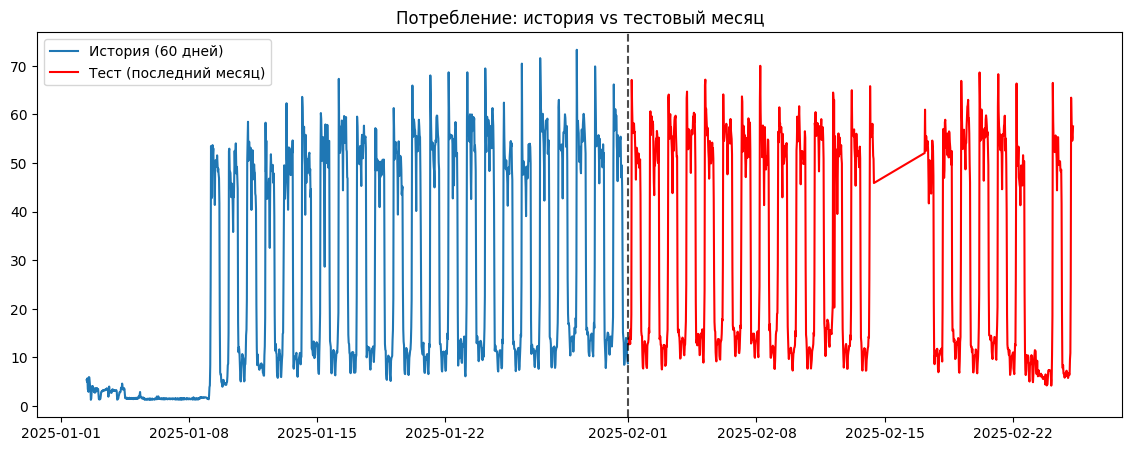

In [99]:
plt.figure(figsize=(14, 5))
plt.plot(y_train[-1400:], label='История (60 дней)')
plt.plot(y_test, label='Тест (последний месяц)', color='red')
plt.axvline(y_test.index[0], color='black', linestyle='--', alpha=0.7)
plt.legend()
plt.title('Потребление: история vs тестовый месяц')
plt.show()

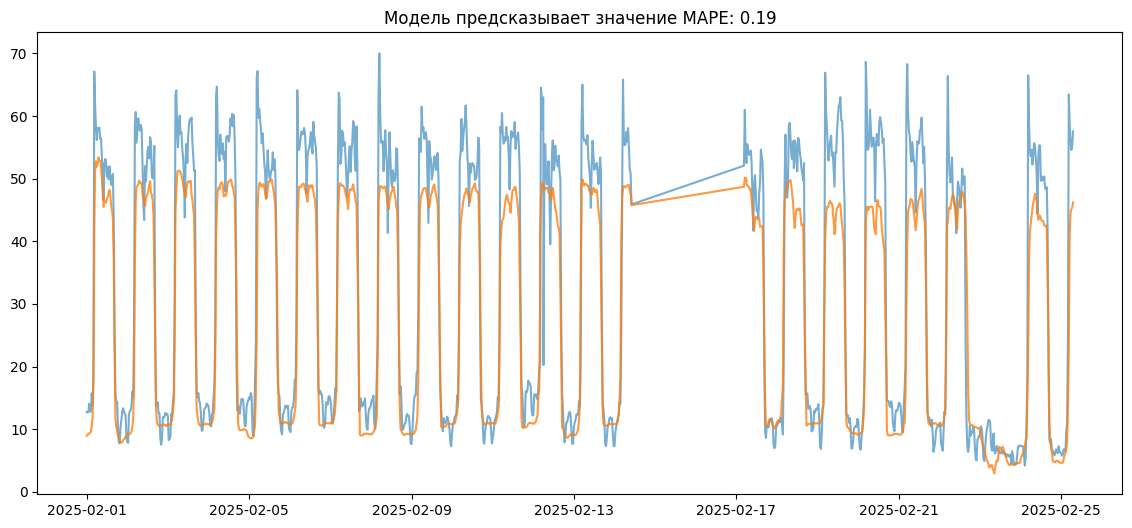

In [103]:
plt.figure(figsize=(14, 6))
plt.title(f'Модель предсказывает значение MAPE: {mape:.2f}')
plt.plot(X_test.index, y_test, label='Оригинальное', alpha=0.6)
plt.plot(X_test.index, prediction_full, label='Предсказанное', alpha=0.8)
plt.show()

In [79]:
ts = TimeSeriesSplit(n_splits=10)
ls_error = []

for fold, (train_index, test_index) in enumerate(ts.split(train)):
  X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
  y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]
  print(f'Начало {fold}')
  model_pipe.fit(X_tr, y_tr)
  prediction = model_pipe.predict(X_te)
  er = mean_absolute_error(y_te, prediction)
  ls_error.append(er)
  print('MAE:',er)


Начало 0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3455
[LightGBM] [Info] Number of data points in the train set: 2013, number of used features: 21
[LightGBM] [Info] Start training from score 11.064816
MAE: 21.369396556503798
Начало 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3616
[LightGBM] [Info] Number of data points in the train set: 4361, number of used features: 23
[LightGBM] [Info] Start training from score 18.947721
MAE: 6.937016103489639
Начало 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Всего точек: 25829
Начальный размер обучения: 20663 точек (80%)
Размер теста на каждом шаге: 1033 точек (4%)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3912
[LightGBM] [Info] Number of data points in the train set: 20327, number of used features: 27
[LightGBM] [Info] Start training from score 24.982180
Фолд 0:
  Обучение: [0 : 20663) → 20663 точек
  Тест:     [20663 : 21696) → 1033 точек
  Период теста: 2023-10-16 23:30:00 → 2023-11-07 10:00:00
  MAE: 10.1489



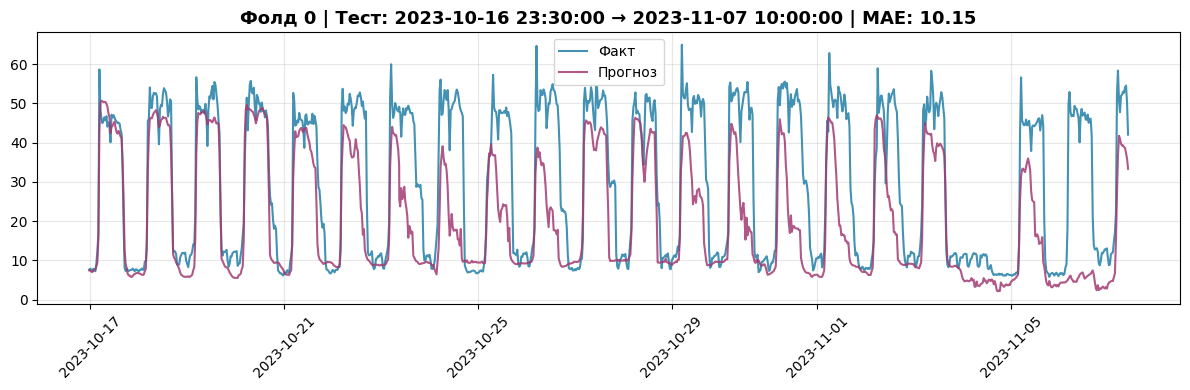

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3917
[LightGBM] [Info] Number of data points in the train set: 21360, number of used features: 27
[LightGBM] [Info] Start training from score 25.213428
Фолд 1:
  Обучение: [0 : 21696) → 21696 точек
  Тест:     [21696 : 22729) → 1033 точек
  Период теста: 2023-11-07 10:30:00 → 2023-11-29 00:00:00
  MAE: 5.5130



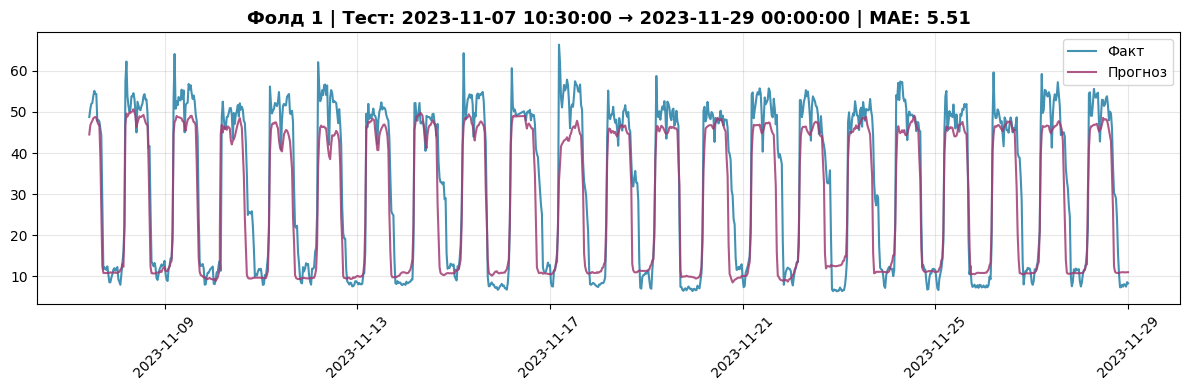

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3918
[LightGBM] [Info] Number of data points in the train set: 22393, number of used features: 27
[LightGBM] [Info] Start training from score 25.555368
Фолд 2:
  Обучение: [0 : 22729) → 22729 точек
  Тест:     [22729 : 23762) → 1033 точек
  Период теста: 2023-11-29 00:30:00 → 2023-12-19 16:30:00
  MAE: 5.5885



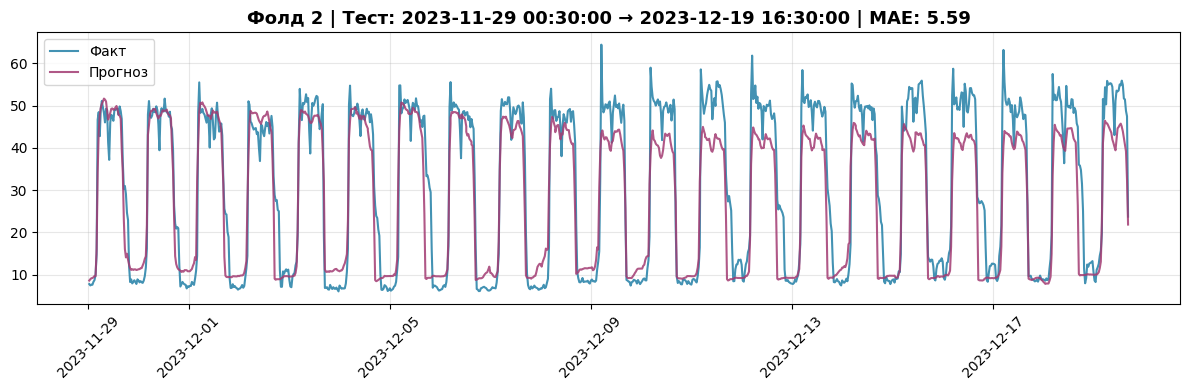

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3918
[LightGBM] [Info] Number of data points in the train set: 23426, number of used features: 27
[LightGBM] [Info] Start training from score 25.838036
Фолд 3:
  Обучение: [0 : 23762) → 23762 точек
  Тест:     [23762 : 24795) → 1033 точек
  Период теста: 2023-12-19 17:00:00 → 2025-01-10 10:00:00
  MAE: 7.7806



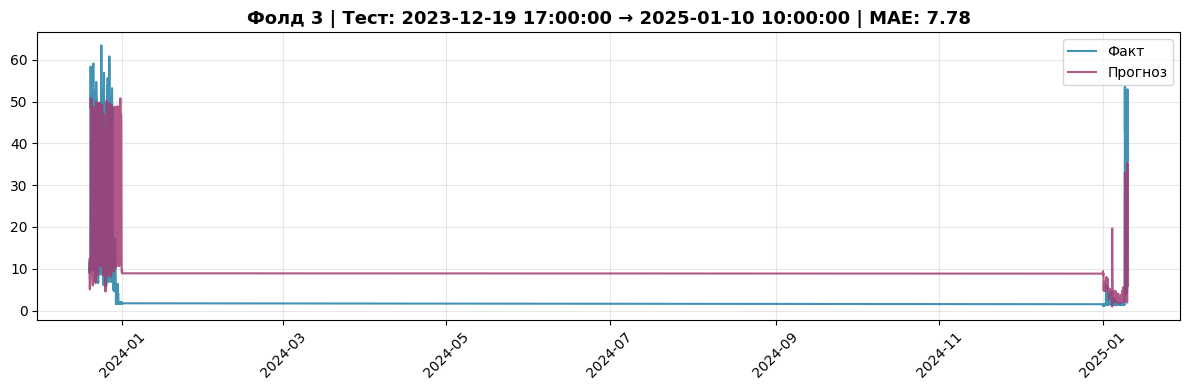

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3926
[LightGBM] [Info] Number of data points in the train set: 24459, number of used features: 27
[LightGBM] [Info] Start training from score 25.424986
Фолд 4:
  Обучение: [0 : 24795) → 24795 точек
  Тест:     [24795 : 25828) → 1033 точек
  Период теста: 2025-01-10 10:30:00 → 2025-01-31 23:00:00
  MAE: 7.1622



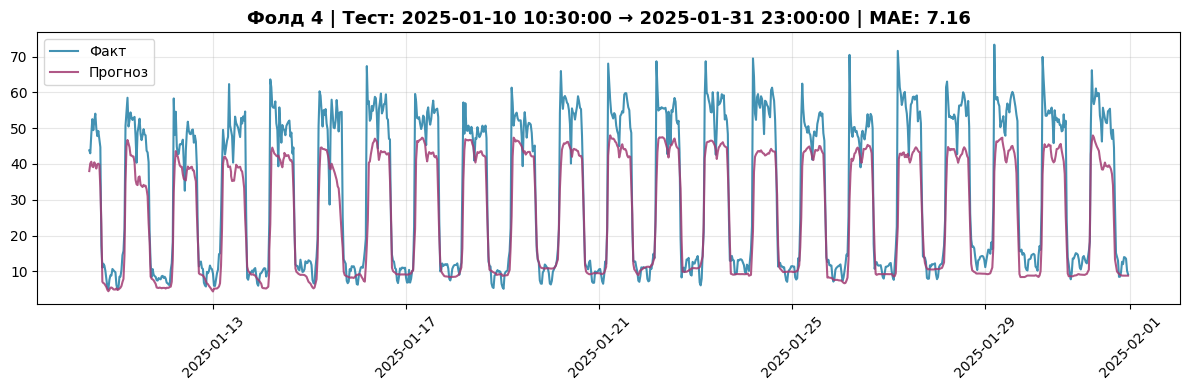

Итог: средний MAE = 7.2386 ± 1.7012


[10.148933148680332,
 5.512967703300213,
 5.5885063650250055,
 7.7805805671260035,
 7.162232027004512]

In [80]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def evaluate_expanding_window(X, y, model_pipe, train_pct=0.8, test_pct=0.04, n_splits=5):
    errors = []
    n = len(y)

    train_size = int(n * train_pct)
    test_size = int(n * test_pct)

    print(f"Всего точек: {n}")
    print(f"Начальный размер обучения: {train_size} точек ({train_pct*100:.0f}%)")
    print(f"Размер теста на каждом шаге: {test_size} точек ({test_pct*100:.0f}%)\n")

    for fold in range(n_splits):
        train_end = train_size + fold * test_size
        test_start = train_end
        test_end = test_start + test_size

        if test_end > n:
            print(f"Фолд {fold}: недостаточно данных. Прерываем.")
            break

        X_tr, y_tr = X.iloc[:train_end], y.iloc[:train_end]
        X_te, y_te = X.iloc[test_start:test_end], y.iloc[test_start:test_end]

        model_pipe.fit(X_tr, y_tr)
        pred = model_pipe.predict(X_te)
        mae = mean_absolute_error(y_te, pred)
        errors.append(mae)

        start_date = y_te.index[0] if hasattr(y_te.index, 'strftime') else test_start
        end_date = y_te.index[-1] if hasattr(y_te.index, 'strftime') else test_end - 1

        print(f"Фолд {fold}:")
        print(f"  Обучение: [0 : {train_end}) → {len(y_tr)} точек")
        print(f"  Тест:     [{test_start} : {test_end}) → {len(y_te)} точек")
        print(f"  Период теста: {start_date} → {end_date}")
        print(f"  MAE: {mae:.4f}\n")

        plt.figure(figsize=(12, 4))
        plt.plot(y_te.index, y_te.values, color='#2E86AB', label='Факт', alpha=0.9)
        plt.plot(y_te.index, pred, color='#A23B72', label='Прогноз', alpha=0.85)
        plt.title(f'Фолд {fold} | Тест: {start_date} → {end_date} | MAE: {mae:.2f}',
                 fontsize=13, fontweight='bold')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    if errors:
        print(f"Итог: средний MAE = {np.mean(errors):.4f} ± {np.std(errors):.4f}")
    return errors
evaluate_expanding_window(X_train, y_train, model_pipe)

In [81]:
name_feature = model_pipe.named_steps['model'].feature_names_

In [82]:
weight_model = model_pipe['model'].base_model.feature_importances_

In [83]:
influence_feature = pd.DataFrame({
    'name_feature':name_feature,
    'weight_model':weight_model
})

In [84]:
influence_feature

,name_feature,weight_model
0,temperature,1884
1,apparent_temperature,1575
2,precipitation,221
3,rain,234
4,snowfall,297
5,weather_code,555
6,pressure_msl,1387
7,surface_pressure,989
8,wind_direction,1541
9,wind_gusts,1879


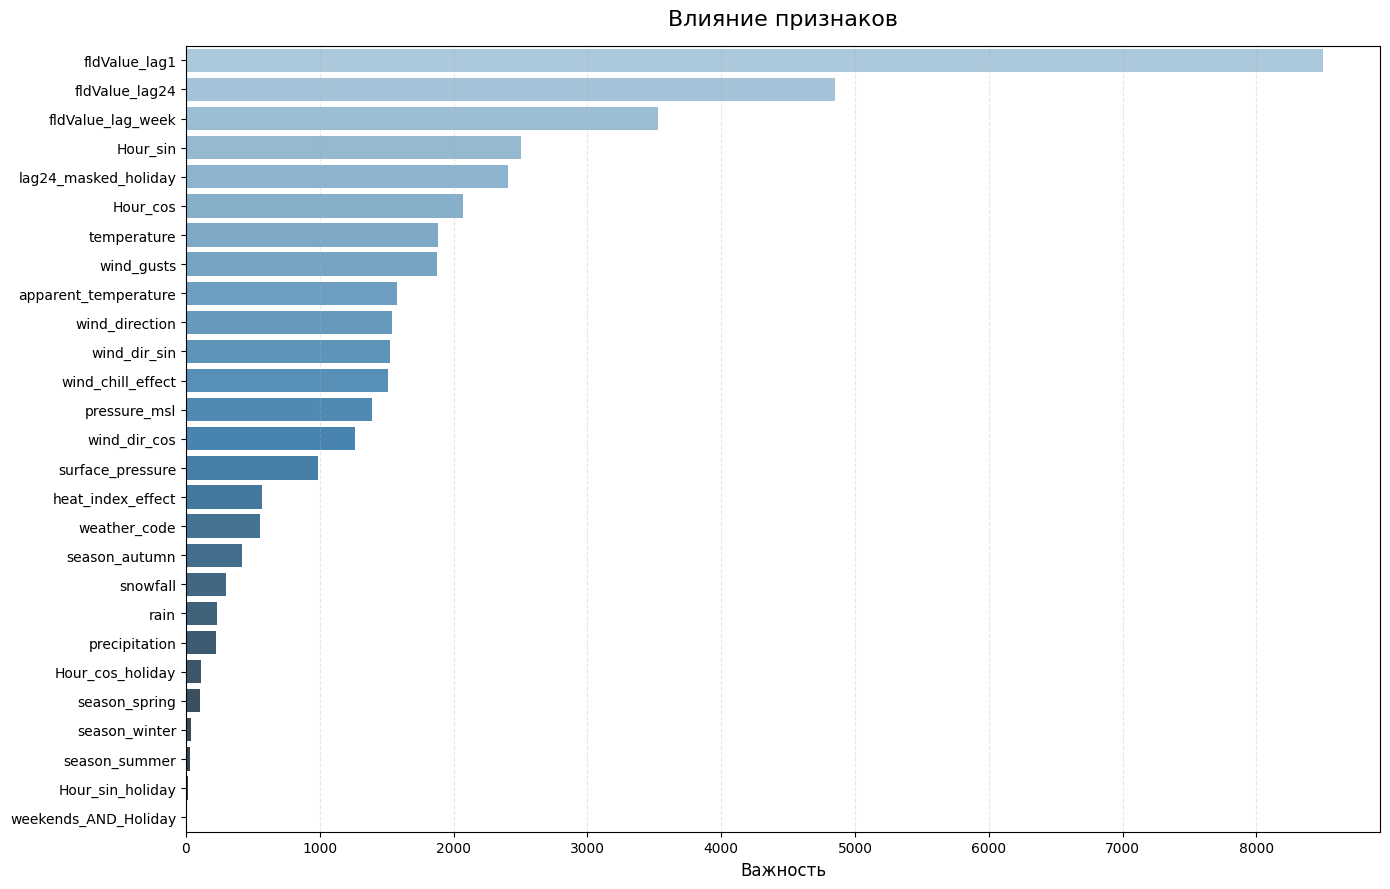

In [85]:
plt.figure(figsize=(14, 9))
sns.barplot(data=influence_feature.sort_values('weight_model', ascending = False),
            x='weight_model', y='name_feature',
            palette='Blues_d')
plt.title('Влияние признаков', fontsize=16, pad=15)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


In [86]:
import joblib

joblib.dump(model_pipe, 'model_power_forecast.pkl')

['model_power_forecast.pkl']